In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
from pymsastro.spectrum.synthetic.analyze import *
from pymsastro.spectrum.synthetic import SynSpectrum
import numpy as np

In [3]:
# Signal
signal = np.ones(1000) * 50
# Spectrum
spec = SynSpectrum(signal)
# Make an analysation class for no weighting
analyze = AddSynSpectrumAnalyseNone()
# Analyze the spectrum added to itself
analyze.analyze(spec, spec)
# Print the result
print(analyze.result)

{'rmse_snr': [6.8525305585855376], 'der_snr': [6.3544463668904063], 'rmse_noise': [7.2965745387818801], 'der_signal': [50.0], 'der_noise': [7.8685061000000003]}


In [4]:
# Do the same analyzation with the same spectrum again
analyze.analyze(spec, spec)
# Print the result
print(analyze.result)
# Same result as before but added to the results lists.

{'rmse_snr': [6.8525305585855376, 6.8525305585855376], 'der_snr': [6.3544463668904063, 6.3544463668904063], 'rmse_noise': [7.2965745387818801, 7.2965745387818801], 'der_signal': [50.0, 50.0], 'der_noise': [7.8685061000000003, 7.8685061000000003]}


In [5]:
# Doing it 10 times more
for i in range(10):
    analyze.analyze(spec, spec)
print(analyze.result)
# It's getting bigger.

{'rmse_snr': [6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376, 6.8525305585855376], 'der_snr': [6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063, 6.3544463668904063], 'rmse_noise': [7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801, 7.2965745387818801], 'der_signal': [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], 'der_noise': [7.8685061000000003, 7.8685061000000003, 7.8685061000000003, 7.8685061000000003, 7.8685061000000003, 7.8685061000000003, 7.868506100000

In [6]:
# Now make a factory
signal1 = np.ones(10000) * 10
signal2 = np.ones(10000) * 20
factory = AnalyseFactory(signal1, signal2)
factory.run_analysation(1, 1, 5, 5)
print(factory.result)

{'DER   - 1/N^2  ': {'rmse_snr': [3.2535443423593997], 'der_snr': [3.2515300773243716], 'rmse_noise': [4.4436674896592496], 'der_signal': [14.36712023149965], 'der_noise': [4.4185721459855314]}, 'DER   - Optimal': {'rmse_snr': [3.4379318646850083], 'der_snr': [3.4656818050156422], 'rmse_noise': [4.6978291312399501], 'der_signal': [16.085343938500614], 'der_noise': [4.6413216340927219]}, 'Ideal - 1/N    ': {'rmse_snr': [3.3007840002591404], 'der_snr': [3.2963414235287849], 'rmse_noise': [4.4493276945161684], 'der_signal': [14.597869375956472], 'der_noise': [4.4285064865426547]}, 'Ideal - Optimal': {'rmse_snr': [3.4375627118441798], 'der_snr': [3.463999472140598], 'rmse_noise': [4.679756522349761], 'der_signal': [16.02177727822971], 'der_noise': [4.6252250922916458]}, 'None           ': {'rmse_snr': [3.3541489591985298], 'der_snr': [3.358597330106182], 'rmse_noise': [4.4720732986123055], 'der_signal': [14.941430362478922], 'der_noise': [4.448711439309859]}, 'Ideal - 1/N^2  ': {'rmse_snr'

In [7]:
# But a factory is getting really good if there the spectrums should change a bit.

# Suppose signal 1 should be in the range of 10-30 with 100 steps:
factor1 = np.linspace(5, 45, 100)
signal1 = np.ones(10000)
#factor2 = np.linspace(5, 50, 100)
signal2 = np.ones(10000)

factory = AnalyseFactory(signal1, signal2)
factory.run_analysation(factor1, 25, 5, 5)

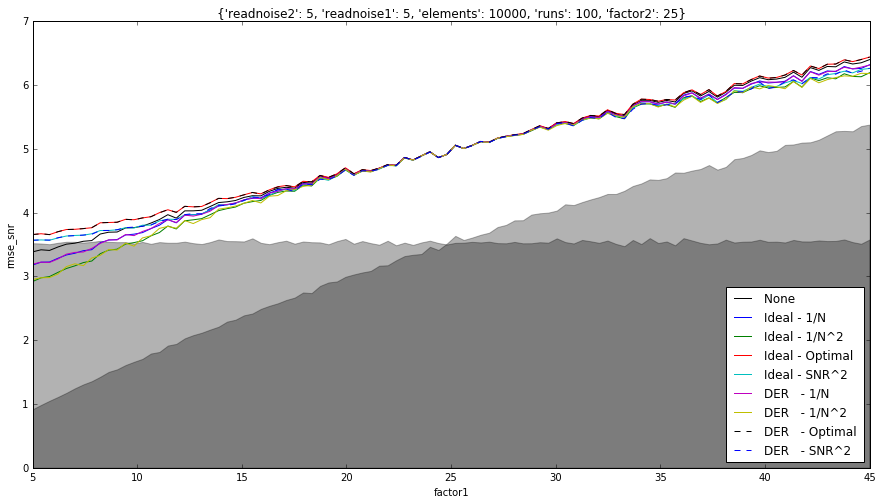

In [8]:
factory.plot('rmse_snr', include_ideal=True, include_der=True)

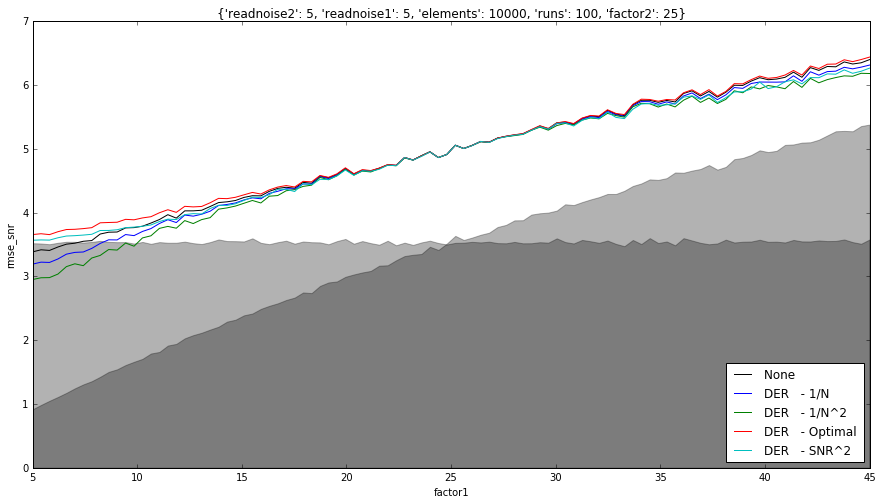

In [9]:
factory.plot('rmse_snr', include_ideal=False, include_der=True)

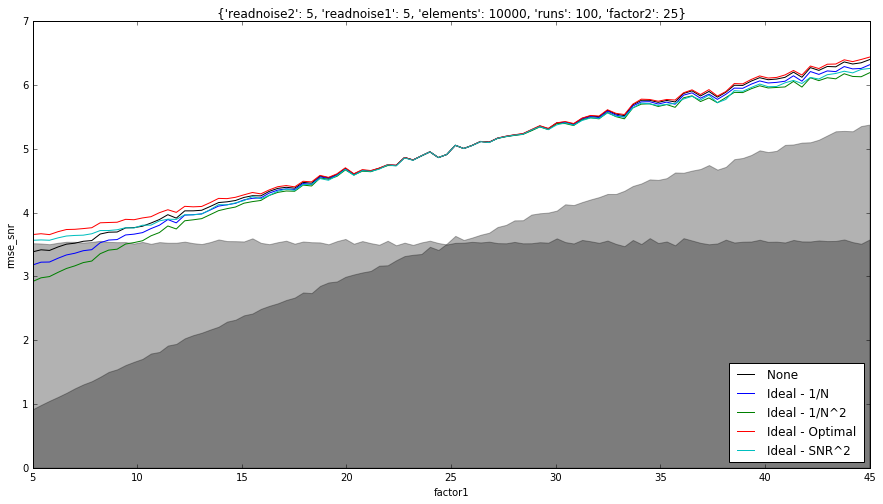

In [10]:
factory.plot('rmse_snr', include_ideal=True, include_der=False)

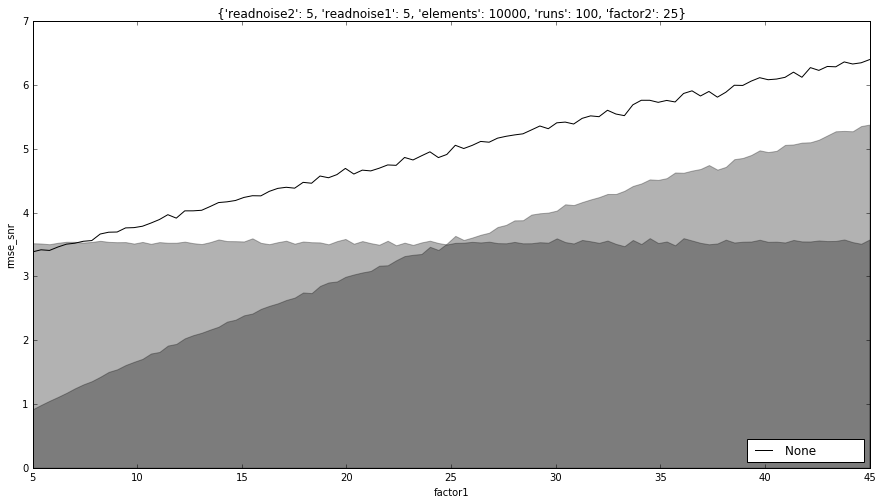

In [11]:
factory.plot('rmse_snr', include_ideal=False, include_der=False)

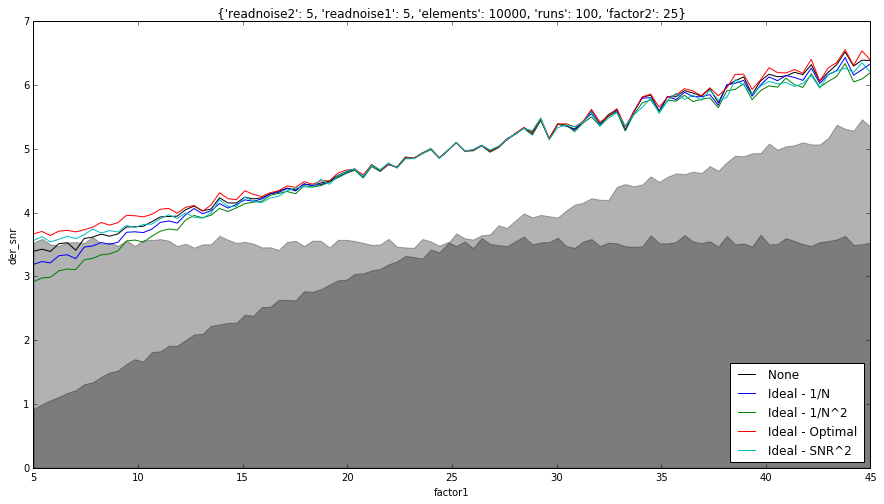

In [12]:
factory.plot('der_snr', include_ideal=True, include_der=False)

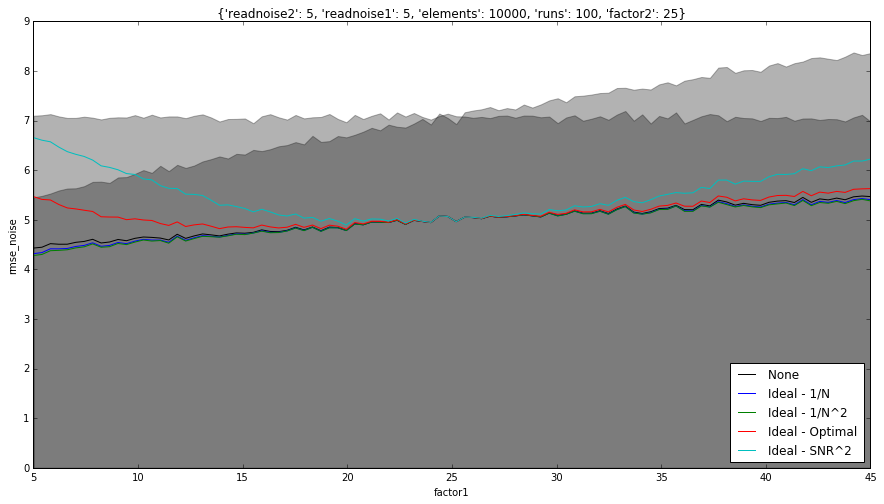

In [13]:
factory.plot('rmse_noise', include_ideal=True, include_der=False)

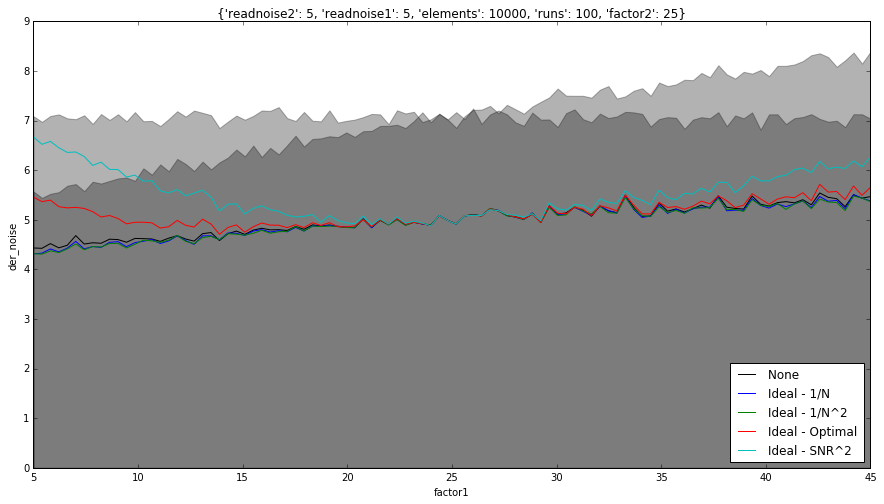

In [14]:
factory.plot('der_noise', include_ideal=True, include_der=False)

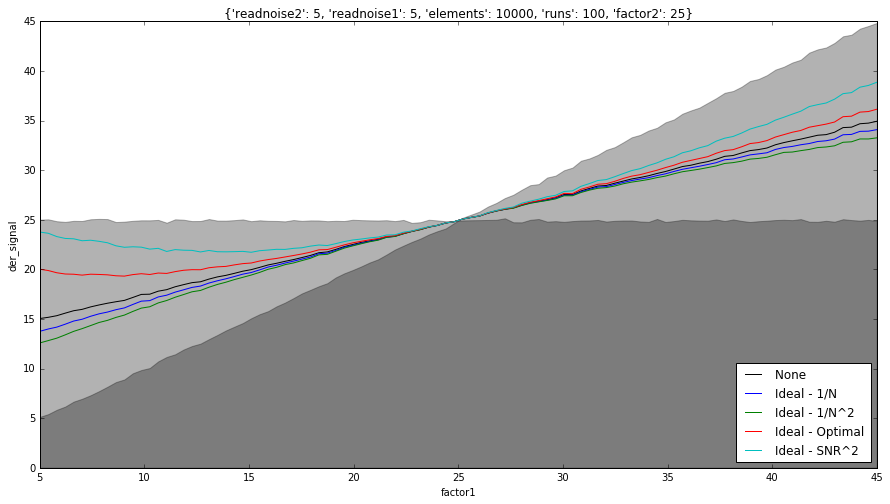

In [15]:
factory.plot('der_signal', include_ideal=True, include_der=False)

In [16]:
factory.save('test.json')

In [17]:
factory2 = AnalyseFactory.fromfile('test.json')

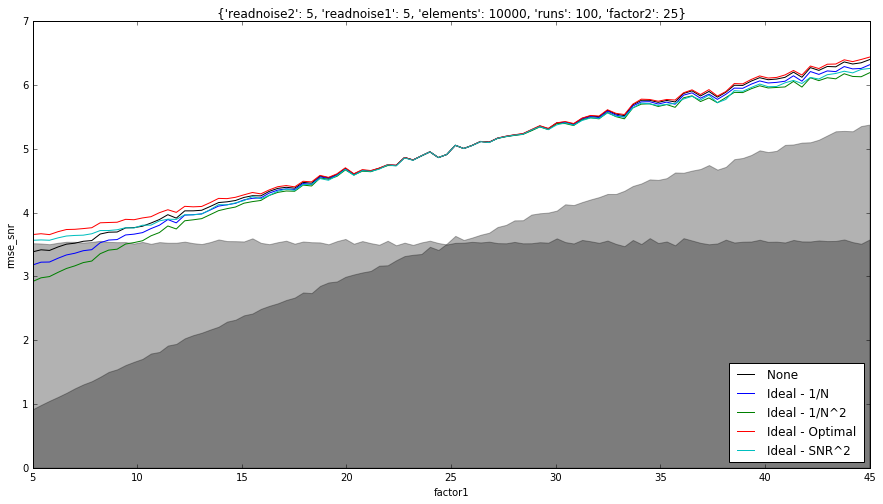

In [18]:
factory2.plot('rmse_snr', include_ideal=True, include_der=False)